In [18]:
from keras.models import load_model
import joblib
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [23]:

scale_x = joblib.load("heston_x_scaler.save")
scale_y = joblib.load("heston_y_scaler.save")

/Users/sani/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.21.2 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [5]:
dataset = pd.read_csv("heston_training.csv")

In [7]:
X_test = scale_x.transform(dataset.iloc[:, :9])
y_test = np.array(dataset.iloc[:, 9].to_numpy())

In [14]:
model = load_model("heston_model.h5")
prediction = model.predict(X_test)

[[1.1899964e+01]
 [7.7347040e+00]
 [3.5836072e+00]
 [7.1949870e-03]
 [4.8608729e-03]
 [4.7981883e-03]
 [4.7778385e-03]
 [4.7699460e-03]
 [2.0352743e+01]
 [1.6204071e+01]]
[11.8677784   7.71828479  3.56879118  0.          0.          0.
  0.          0.         20.35459674 16.20510313]
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.125     ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.25      ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.375     ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.5       ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.625     ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.75      ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.875     ]
 [0.         0.         0.         0.     

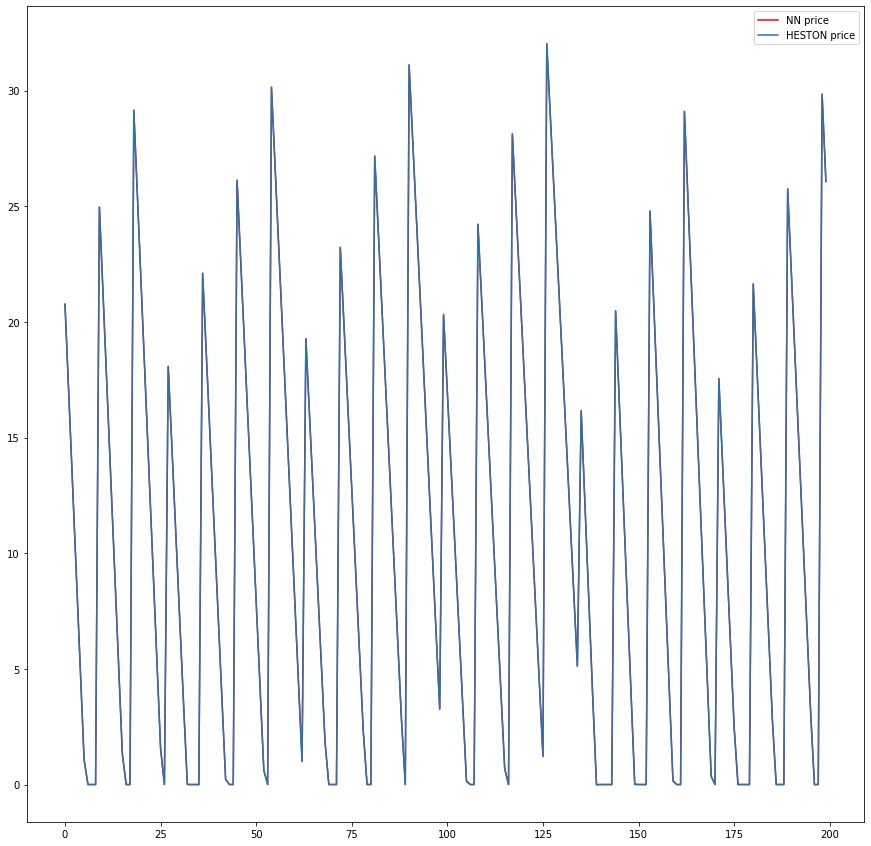

<Figure size 432x288 with 0 Axes>

In [43]:
inv_prediction = np.array(scale_y.inverse_transform(prediction))

plt.figure(figsize=(15,15))
plt.plot(inv_prediction[9800:10000], color="red", label="NN price")
plt.plot(y_test[9800:10000], label= "HESTON price")
plt.legend()
plt.show()
plt.savefig("comparison_fair.png")


In [50]:
new_inv = inv_prediction.T[0][y_test!=0]
y = y_test[y_test!=0]
diff = abs(new_inv-y)/y
np.mean(diff)

0.027402542155648937

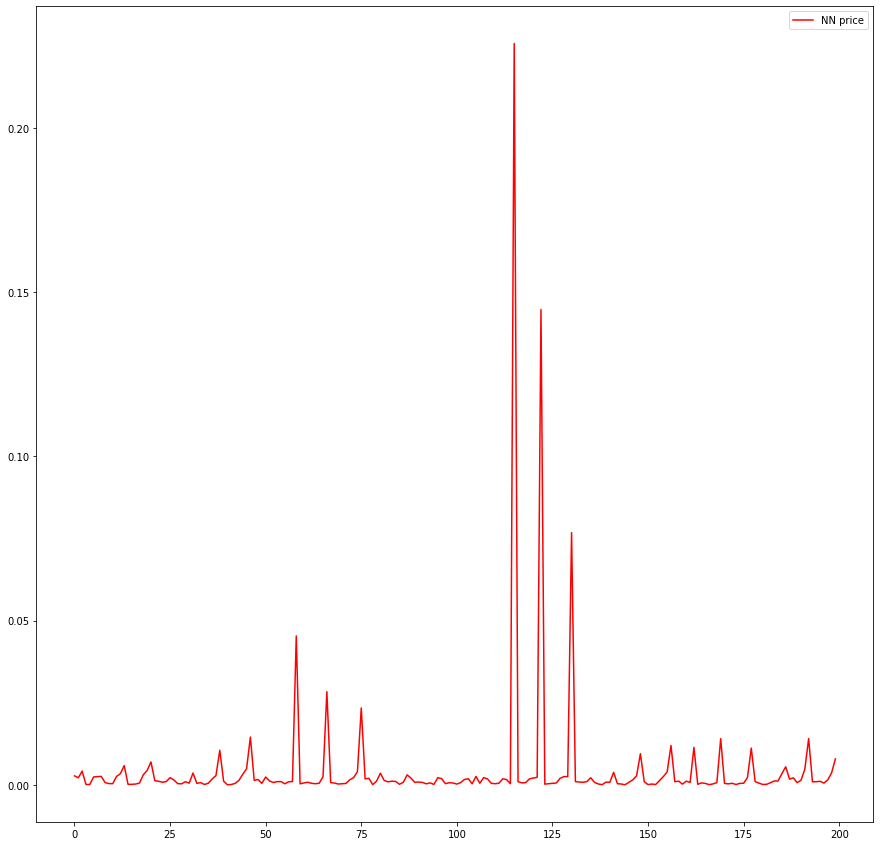

In [52]:
plt.figure(figsize=(15,15))
plt.plot(diff[0:200], color="red", label="NN price")
plt.legend()
plt.show()


/Users/gioel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


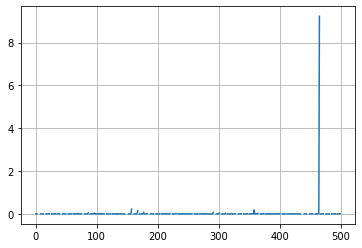

In [7]:
delta = []
for i in range(500):
    delta.append(abs(inv_prediction[i]-y_test[i])/y_test[i])


#plt.figure(figsize = (15,10))
plt.plot(delta)#y_test, predictions)
#plt.xlabel("Actual Price")
#plt.ylabel("Predicted Price")
#plt.plot([0,1], [0,1], 'r')
plt.grid(True)
plt.show()

/Users/sani/tesi_sidorela/heston.py:11: RuntimeWarning: divide by zero encountered in cdouble_scalars
  g1 = (xi+d)/(xi-d)
/Users/sani/tesi_sidorela/heston.py:11: RuntimeWarning: invalid value encountered in cdouble_scalars
  g1 = (xi+d)/(xi-d)
/Users/sani/tesi_sidorela/heston.py:25: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return 1/2 + 1/np.pi * quad(integrand, 1e-15, right_lim, limit=2000 )[0]


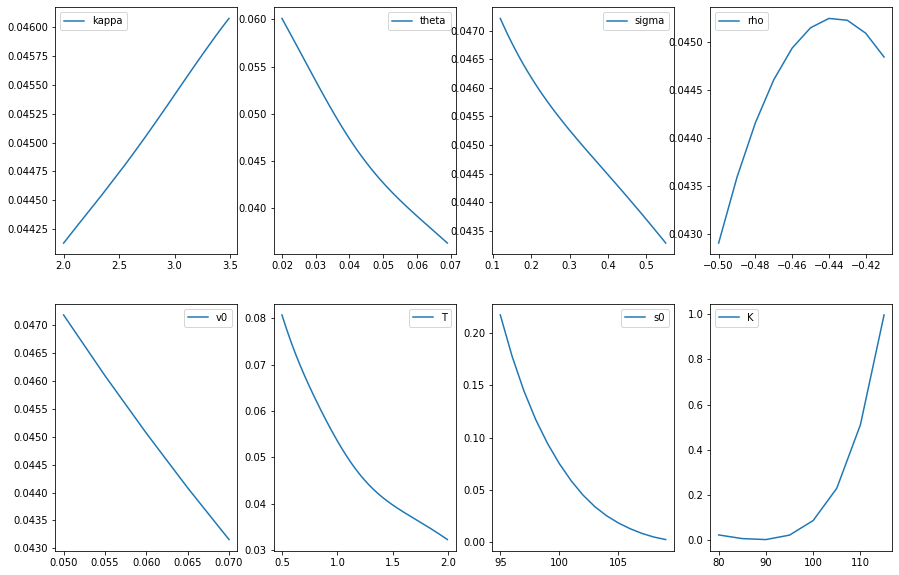

In [39]:
import numpy as np
from heston import fourier_call_price

params = {"kappa":np.arange(2, 3.5, 0.01),
          "theta": np.arange(0.02, 0.07, 0.001),
          "sigma": np.arange(0.1, 0.55, 0.01),     
          "rho": np.arange(-0.5, -0.4, 0.01),
          "v0": np.arange(0.05,0.07,0.005), 
          "r":0.01,
          "T": np.arange(0.5, 2, 0.01),
          "s0": np.arange(95, 110, 1), 
          "K": np.arange(80, 120, 5)}

means = {k:np.mean(v) for k,v in params.items()}
index = 1

plt.figure(figsize=(15, 10))
for k, v in params.items():
    if k == 'r':
        continue
    X = dict(means)
    x_plot = []
    y_plot = []
    for x in params[k]:
        X[k] = x
        y_plot.append(fourier_call_price(**X))
        x_plot.append(list(X.values()))
    #print (x_plot[:10])
    trans = scale_x.transform(x_plot)
    #print (trans[:10])
    predict = model.predict(trans)
    #print (predict.T[0][:10])
    inv_predict = scale_y.inverse_transform(predict)
    #print (inv_predict[:10])
    
    # predict.T[0] serve per trasformare le predizioni in una lista
    diff = (abs(inv_predict.T[0]-y_plot))/y_plot
    #print (inv_predict.T[0])
    #print (y_plot)
    sub = plt.subplot(2, 4, index)
    plt.plot(params[k], diff, label=k)
    sub.legend()
    index += 1  
        
plt.show()
